# Cap. 9 - Pandas



O pandas é a biblioteca mais comumente utilizada para manipulação e análise de dados (tabulares). Diferentemente do numpy, os dados no pandas podem conter diferentes tipos.

Os dois principais objetos que representam dados no pandas são `Series` e `DataFrame`, sendo o primeiro dedicado a dados em uma dimensão e o segundo a dados tabulares.

A maneira tradicional para importar esse biblioteca é

```
import pandas as pd
```

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Series

Vamos começar com dados na forma de objetos `Series`.

Vejamos um exemplo:

In [ ]:
river_lengths = pd.Series([6300, 6650, 6275, 6400])

In [ ]:
river_lengths

0    6300
1    6650
2    6275
3    6400
dtype: int64

Veja que por padrão o `dtype` inferido foi int64, mas podemos mudar esse comportamento:

In [ ]:
river_lengths = pd.Series([6300, 6650, 6275, 6400],
                           dtype=float)

In [ ]:
river_lengths

0    6300.0
1    6650.0
2    6275.0
3    6400.0
dtype: float64

Cada elemento de uma `Series` tem um índice único associado, o qual pode ser acessado via `.index`:

In [ ]:
river_lengths.index

RangeIndex(start=0, stop=4, step=1)

O retorno é um objeto do tipo `RangeIndex` o qual é uma maneira eficiente de armazenar sequências monotônicas na memória. Esse objeto pode ser listado:

In [ ]:
list(river_lengths.index)

[0, 1, 2, 3]

Além disso, podemos usar strings como índices:

In [ ]:
river_lengths = pd.Series([6300, 6650, 6275, 6400],
                           index=['Yangtze', 'Nile', 'Mississippi', 'Amazon'],
                           name='Length /km',
                           dtype=float)

In [ ]:
river_lengths

Yangtze        6300.0
Nile           6650.0
Mississippi    6275.0
Amazon         6400.0
Name: Length /km, dtype: float64

Também podemos criar uma `Series` usando um dicionário:

In [ ]:
river_lengths = pd.Series(data={'Yangtze': 6300, 'Nile': 6650,
                                'Mississippi': 6275, 'Amazon': 6400} ,
                          name='Length /km',
                          dtype=float)

In [ ]:
river_lengths

Yangtze        6300.0
Nile           6650.0
Mississippi    6275.0
Amazon         6400.0
Name: Length /km, dtype: float64

A grande vantagem dessa estrutura é que podemos usar esses índices para fatiar e selecionar elementos:

In [ ]:
river_lengths['Nile']

6650.0

In [ ]:
river_lengths[['Amazon', 'Nile', 'Yangtze']]

Amazon     6400.0
Nile       6650.0
Yangtze    6300.0
Name: Length /km, dtype: float64

In [ ]:
river_lengths['Nile':'Amazon']

Nile           6650.0
Mississippi    6275.0
Amazon         6400.0
Name: Length /km, dtype: float64

Também podemos usar os nomes nos índices como atributos:

In [ ]:
river_lengths.Mississippi

6275.0

In [ ]:
river_lengths.Amazon

6400.0

Isso não funciona quando os nomes são palavras reservadas ou quando o nome tem espaço:

In [ ]:
test = pd.Series(data={'lambda': 10, ' a': 6650,
                       'a b':10} ,
                        name='Length /km',
                        dtype=float)

In [ ]:
test

lambda      10.0
 a        6650.0
a b         10.0
Name: Length /km, dtype: float64

In [ ]:
test.lambda

SyntaxError: invalid syntax (<ipython-input-19-0b3062ef0fc4>, line 1)

In [ ]:
test["lambda"]

10.0

In [ ]:
test."a b"

SyntaxError: invalid syntax (<ipython-input-21-fa29a56c534c>, line 1)

Podemos fazer operações nesses objetos

In [ ]:
river_lengths

Yangtze        6300.0
Nile           6650.0
Mississippi    6275.0
Amazon         6400.0
Name: Length /km, dtype: float64

In [ ]:
#converter para milhas
river_lengths *= 0.621371
river_lengths.name = 'Length / miles'

In [ ]:
river_lengths

Yangtze        3914.637300
Nile           4132.117150
Mississippi    3899.103025
Amazon         3976.774400
Name: Length / miles, dtype: float64

Podemos fazer comparações e filtros:

In [ ]:
river_lengths > 4000

Yangtze        False
Nile            True
Mississippi    False
Amazon         False
Name: Length / miles, dtype: bool

In [ ]:
river_lengths[river_lengths > 4000]

Nile    4132.11715
Name: Length / miles, dtype: float64

In [ ]:
river_lengths[river_lengths <= 4000]

Yangtze        3914.637300
Mississippi    3899.103025
Amazon         3976.774400
Name: Length / miles, dtype: float64

Podemos também ordenar, tanto pelo índice quanto pelos valores:

In [ ]:
river_lengths

Yangtze        3914.637300
Nile           4132.117150
Mississippi    3899.103025
Amazon         3976.774400
Name: Length / miles, dtype: float64

In [ ]:
river_lengths.sort_index()

Amazon         3976.774400
Mississippi    3899.103025
Nile           4132.117150
Yangtze        3914.637300
Name: Length / miles, dtype: float64

In [ ]:
#não modifica o dado original
river_lengths

Yangtze        3914.637300
Nile           4132.117150
Mississippi    3899.103025
Amazon         3976.774400
Name: Length / miles, dtype: float64

In [ ]:
#modifica o dado original
river_lengths.sort_index(inplace=True)

In [ ]:
river_lengths

Amazon         3976.774400
Mississippi    3899.103025
Nile           4132.117150
Yangtze        3914.637300
Name: Length / miles, dtype: float64

In [ ]:
#ordem decrescente de valores
river_lengths.sort_values(ascending=False)

Nile           4132.117150
Amazon         3976.774400
Yangtze        3914.637300
Mississippi    3899.103025
Name: Length / miles, dtype: float64

Podemos usar o `in` para testar a presença de elementos no dado:

In [ ]:
'Amazon' in river_lengths

True

In [ ]:
'Parana' in river_lengths

False

In [ ]:
river_lengths

Amazon         3976.774400
Mississippi    3899.103025
Nile           4132.117150
Yangtze        3914.637300
Name: Length / miles, dtype: float64

Podemos combinar duas `Series`

In [ ]:
masses = pd.Series({'Ganymede': 1.482e23,
                    'Callisto': 1.076e23,
                    'Io': 8.932e22,
                    'Europa ': 4.800e22,
                    'Moon': 7.342e22,
                    'Earth': 5.972e24},
                    name='mass /kg')

In [ ]:
radii = pd.Series({'Ganymede': 2.634e6,
                   'Io': 1.82e6,
                   'Moon': 1.737e6,
                   'Earth': 6.371e6},
                    name='radius /m')

In [ ]:
masses

Ganymede    1.482000e+23
Callisto    1.076000e+23
Io          8.932000e+22
Europa      4.800000e+22
Moon        7.342000e+22
Earth       5.972000e+24
Name: mass /kg, dtype: float64

In [ ]:
radii

Ganymede    2634000.0
Io          1820000.0
Moon        1737000.0
Earth       6371000.0
Name: radius /m, dtype: float64

In [ ]:
from scipy.constants import G

In [ ]:
#vai ser uma outra serie
surface_g = G*masses/radii**2

In [ ]:
surface_g

Callisto         NaN
Earth       9.819973
Europa           NaN
Ganymede    1.425681
Io          1.799748
Moon        1.624129
dtype: float64

In [ ]:
surface_g.name = 'surface gravity /m.s -2'
surface_g.index.name = 'Body'

In [ ]:
#quando não há correspondência, NaNs são retornados
surface_g

Body
Callisto         NaN
Earth       9.819973
Europa           NaN
Ganymede    1.425681
Io          1.799748
Moon        1.624129
Name: surface gravity /m.s -2, dtype: float64

In [ ]:
#máscara com os nulos
surface_g.isnull()

Body
Callisto     True
Earth       False
Europa       True
Ganymede    False
Io          False
Moon        False
Name: surface gravity /m.s -2, dtype: bool

In [ ]:
surface_g[~surface_g.isnull()]

Body
Earth       9.819973
Ganymede    1.425681
Io          1.799748
Moon        1.624129
Name: surface gravity /m.s -2, dtype: float64

In [ ]:
#remove nans
surface_g.dropna()

Body
Earth       9.819973
Ganymede    1.425681
Io          1.799748
Moon        1.624129
Name: surface gravity /m.s -2, dtype: float64

In [ ]:
#não altera o dado original
surface_g

Body
Callisto         NaN
Earth       9.819973
Europa           NaN
Ganymede    1.425681
Io          1.799748
Moon        1.624129
Name: surface gravity /m.s -2, dtype: float64

In [ ]:
#para converter para um array do numpy
surface_g.values

array([       nan, 9.81997343,        nan, 1.42568108, 1.79974784,
       1.6241288 ])

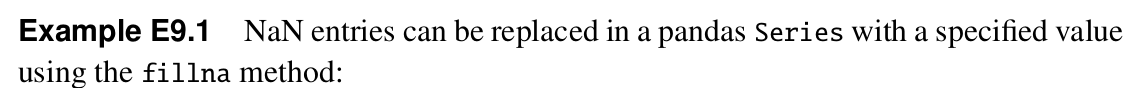

In [ ]:
ser1 = pd.Series({'b': 2, 'c': -5, 'd': 6.5}, index=list('abcd'))

In [ ]:
ser1

a    NaN
b    2.0
c   -5.0
d    6.5
dtype: float64

In [ ]:
?ser1.fillna

In [ ]:
ser1.fillna(method='backfill')

a    2.0
b    2.0
c   -5.0
d    6.5
dtype: float64

In [ ]:
ser1.fillna(1, inplace=True)
ser1

a    1.0
b    2.0
c   -5.0
d    6.5
dtype: float64

In [ ]:
ser2 = pd.Series([-3.4, 0, 0, 1], index=ser1.index)
ser2

a   -3.4
b    0.0
c    0.0
d    1.0
dtype: float64

In [ ]:
ser3 = ser1 / ser2
ser3

a   -0.294118
b         inf
c        -inf
d    6.500000
dtype: float64

In [ ]:
#substituir \infty e -infty por zero
ser3.replace([np.inf, -np.inf], 0)

a   -0.294118
b    0.000000
c    0.000000
d    6.500000
dtype: float64

In [ ]:
#não altera o dado
ser3

a   -0.294118
b         inf
c        -inf
d    6.500000
dtype: float64

In [ ]:
ser3.replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
#altera o dado
ser3

a   -0.294118
b    0.000000
c    0.000000
d    6.500000
dtype: float64

## DataFrame

Esses objetos são usados para representar tabelas. Podemos criá-los usando dicionários:

In [ ]:
data = {'mass': [1.482e23 , 1.076e23 , 8.932e22 , 4.800e22 , 7.342e22],
        'radius': [2.634e6 , None , 1.822e6 , None , 1.737e6],
        'parent': ['Jupiter','Jupiter','Jupiter','Jupiter','Earth']
       }

index = ['Ganymede', 'Callisto', 'Io', 'Europa', 'Moon']

In [ ]:
df = pd.DataFrame(data, index=index)

In [ ]:
df

,mass,radius,parent
Ganymede,1.482000e+23,2634000.0,Jupiter
Callisto,1.076000e+23,NaN,Jupiter
Io,8.932000e+22,1822000.0,Jupiter
Europa,4.800000e+22,NaN,Jupiter
Moon,7.342000e+22,1737000.0,Earth


Podemos renomear colunas e índices com o `.rename`.

In [ ]:
df.rename(index={'Moon': 'The Moon'}) #indice é o padrão

,mass,radius,parent
Ganymede,1.482000e+23,2634000.0,Jupiter
Callisto,1.076000e+23,NaN,Jupiter
Io,8.932000e+22,1822000.0,Jupiter
Europa,4.800000e+22,NaN,Jupiter
The Moon,7.342000e+22,1737000.0,Earth


In [ ]:
#não é inplace
df

,mass,radius,parent
Ganymede,1.482000e+23,2634000.0,Jupiter
Callisto,1.076000e+23,NaN,Jupiter
Io,8.932000e+22,1822000.0,Jupiter
Europa,4.800000e+22,NaN,Jupiter
Moon,7.342000e+22,1737000.0,Earth


In [ ]:
df.rename(columns={'parent': 'planet'})

,mass,radius,planet
Ganymede,1.482000e+23,2634000.0,Jupiter
Callisto,1.076000e+23,NaN,Jupiter
Io,8.932000e+22,1822000.0,Jupiter
Europa,4.800000e+22,NaN,Jupiter
Moon,7.342000e+22,1737000.0,Earth


In [ ]:
df

,mass,radius,parent
Ganymede,1.482000e+23,2634000.0,Jupiter
Callisto,1.076000e+23,NaN,Jupiter
Io,8.932000e+22,1822000.0,Jupiter
Europa,4.800000e+22,NaN,Jupiter
Moon,7.342000e+22,1737000.0,Earth


In [ ]:
df.rename(columns={'parent': 'planet'}, inplace=True)

In [ ]:
df

,mass,radius,planet
Ganymede,1.482000e+23,2634000.0,Jupiter
Callisto,1.076000e+23,NaN,Jupiter
Io,8.932000e+22,1822000.0,Jupiter
Europa,4.800000e+22,NaN,Jupiter
Moon,7.342000e+22,1737000.0,Earth


Podemos acessar colunas usando seus nomes. O retorno é um objeto Series:

In [ ]:
df['mass']

Ganymede    1.482000e+23
Callisto    1.076000e+23
Io          8.932000e+22
Europa      4.800000e+22
Moon        7.342000e+22
Name: mass, dtype: float64

In [ ]:
#também pode ser
df.mass

Ganymede    1.482000e+23
Callisto    1.076000e+23
Io          8.932000e+22
Europa      4.800000e+22
Moon        7.342000e+22
Name: mass, dtype: float64

In [ ]:
#como é uma série, podemos indexar
df.mass[2]

8.932e+22

In [ ]:
#e fazer slices
df.mass[2:]

Io        8.932000e+22
Europa    4.800000e+22
Moon      7.342000e+22
Name: mass, dtype: float64

In [ ]:
#usando os índices também
df['mass']['Io']

8.932e+22

In [ ]:
df

,mass,radius,planet
Ganymede,1.482000e+23,2634000.0,Jupiter
Callisto,1.076000e+23,NaN,Jupiter
Io,8.932000e+22,1822000.0,Jupiter
Europa,4.800000e+22,NaN,Jupiter
Moon,7.342000e+22,1737000.0,Earth


In [ ]:
df['radius']['Europa':]

Europa          NaN
Moon      1737000.0
Name: radius, dtype: float64

In [ ]:
df['radius']['Callisto']

nan

In [ ]:
#se tentarmos atribuir valores
df['radius']['Callisto'] = 2.410e6

<ipython-input-88-e3e542e26d9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['radius']['Callisto'] = 2.410e6


Temos uma mensagem warning. Veja que o retorno da expressão é `df['radius']['Callisto']` é uma cópia do dado original. Portanto, essa atribuição está sendo feita para cópia o resultado disso pode ser estranho, embora no caso em questão funcione:

In [ ]:
df

,mass,radius,planet
Ganymede,1.482000e+23,2634000.0,Jupiter
Callisto,1.076000e+23,2410000.0,Jupiter
Io,8.932000e+22,1822000.0,Jupiter
Europa,4.800000e+22,NaN,Jupiter
Moon,7.342000e+22,1737000.0,Earth


Para atribuir valores é melhor usar `.loc` ou `.iloc`, como veremos.

In [ ]:
#loc seleciona linhas
df.loc['Europa']

mass      48000000000000000000000.0
radius                          NaN
planet                      Jupiter
Name: Europa, dtype: object

In [ ]:
#também podemos especificar quais colunas
df.loc['Europa', ['mass', 'planet']]

mass      48000000000000000000000.0
planet                      Jupiter
Name: Europa, dtype: object

In [ ]:
#é possível fazer fancy indexing
# : -> todos
#equivalente a pegar a coluna df['mass']
df.loc[:, 'mass']

Ganymede    1.482000e+23
Callisto    1.076000e+23
Io          8.932000e+22
Europa      4.800000e+22
Moon        7.342000e+22
Name: mass, dtype: float64

In [ ]:
df['mass']

Ganymede    1.482000e+23
Callisto    1.076000e+23
Io          8.932000e+22
Europa      4.800000e+22
Moon        7.342000e+22
Name: mass, dtype: float64

In [ ]:
df.loc['Ganymede':'Io', ['mass', 'radius']]

,mass,radius
Ganymede,1.482000e+23,2634000.0
Callisto,1.076000e+23,2410000.0
Io,8.932000e+22,1822000.0


In [ ]:
df.loc[['Moon', 'Europa'], 'planet']

Moon        Earth
Europa    Jupiter
Name: planet, dtype: object

In [ ]:
#podemos passar uma máscara
df.loc[df.planet=='Jupiter', 'radius']

Ganymede    2634000.0
Callisto    2410000.0
Io          1822000.0
Europa            NaN
Name: radius, dtype: float64

In [ ]:
#outro exemplo de máscara
df.loc[df.radius < 2.e6]

,mass,radius,planet
Io,8.932000e+22,1822000.0,Jupiter
Moon,7.342000e+22,1737000.0,Earth


In [ ]:
#para pegar um único valor linha,coluna
df.loc['Europa', 'mass']

4.8e+22

In [ ]:
df

,mass,radius,planet
Ganymede,1.482000e+23,2634000.0,Jupiter
Callisto,1.076000e+23,2410000.0,Jupiter
Io,8.932000e+22,1822000.0,Jupiter
Europa,4.800000e+22,NaN,Jupiter
Moon,7.342000e+22,1737000.0,Earth


In [ ]:
#podemos fazer atribuições nesse caso
df.loc['Europa', 'radius'] = 1.561e6
df

,mass,radius,planet
Ganymede,1.482000e+23,2634000.0,Jupiter
Callisto,1.076000e+23,2410000.0,Jupiter
Io,8.932000e+22,1822000.0,Jupiter
Europa,4.800000e+22,1561000.0,Jupiter
Moon,7.342000e+22,1737000.0,Earth


Temos ainda o `.iloc` que seleciona dados com base no índice:

In [ ]:
df

,mass,radius,planet
Ganymede,1.482000e+23,2634000.0,Jupiter
Callisto,1.076000e+23,2410000.0,Jupiter
Io,8.932000e+22,1822000.0,Jupiter
Europa,4.800000e+22,1561000.0,Jupiter
Moon,7.342000e+22,1737000.0,Earth


In [ ]:
df.iloc[0] #primeira linha

mass      148200000000000006291456.0
radius                     2634000.0
planet                       Jupiter
Name: Ganymede, dtype: object

In [ ]:
df.iloc[1] #segunda linha

mass      107599999999999995805696.0
radius                     2410000.0
planet                       Jupiter
Name: Callisto, dtype: object

In [ ]:
#todas as linhas, colunas 1 e 2
df.iloc[:, [1, 2]]

,radius,planet
Ganymede,2634000.0,Jupiter
Callisto,2410000.0,Jupiter
Io,1822000.0,Jupiter
Europa,1561000.0,Jupiter
Moon,1737000.0,Earth


In [ ]:
#última linha, segunda coluna
df.iloc[-1,1]

1737000.0

Por fim, ainda podemos usar o `.at` e `.iat`:

In [ ]:
df.at['Moon', 'mass']

7.342e+22

In [ ]:
df.iat[-1, 0]

7.342e+22

**Combinando Series e DataFrames**

In [ ]:
boeing_wingspan = pd.Series({'B747-8': 68.4, 'B777-9': 64.8, 'B787-10': 60.12},
                            name='wingspan')
boeing_length   = pd.Series({'B747-8': 76.3, 'B777-9': 76.7, 'B787-10': 68.28},
                            name='length')
boeing_range    = pd.Series({'B777-9': 13940, 'B787-10': 11910},
                            name='range',
                            dtype=float)

In [ ]:
df_boeing = pd.DataFrame({'wingspan': boeing_wingspan,
                          'length': boeing_length,
                          'range': boeing_range})

In [ ]:
df_airbus = pd.DataFrame({'range': {'A350-1000': 16100 , 'A380-800': 14800},
                          'wingspan': {'A350-1000': 64.75 , 'A380-800': 79.75},
                          'length': {'A350-1000': 73.8 , 'A380-800': 72.72}})

In [ ]:
df_boeing

,wingspan,length,range
B747-8,68.40,76.30,NaN
B777-9,64.80,76.70,13940.0
B787-10,60.12,68.28,11910.0


In [ ]:
df_airbus

,range,wingspan,length
A350-1000,16100,64.75,73.80
A380-800,14800,79.75,72.72


In [ ]:
#juntando dois dataframes
pd.concat((df_airbus, df_boeing))

,range,wingspan,length
A350-1000,16100.0,64.75,73.80
A380-800,14800.0,79.75,72.72
B747-8,NaN,68.40,76.30
B777-9,13940.0,64.80,76.70
B787-10,11910.0,60.12,68.28


In [ ]:
df_airbus

,range,wingspan,length
A350-1000,16100,64.75,73.80
A380-800,14800,79.75,72.72


In [ ]:
#para adicionar uma coluna nova
df_airbus['speed'] = [950, 903]

In [ ]:
df_boeing

,wingspan,length,range
B747-8,68.40,76.30,NaN
B777-9,64.80,76.70,13940.0
B787-10,60.12,68.28,11910.0


In [ ]:
df_airbus

,range,wingspan,length,speed
A350-1000,16100,64.75,73.80,950
A380-800,14800,79.75,72.72,903


In [ ]:
#juntando dois dataframes com colunas diferentes
#os dados que não existem ficam como nans
df_aircraft = pd.concat((df_airbus, df_boeing))
df_aircraft

,range,wingspan,length,speed
A350-1000,16100.0,64.75,73.80,950.0
A380-800,14800.0,79.75,72.72,903.0
B747-8,NaN,68.40,76.30,NaN
B777-9,13940.0,64.80,76.70,NaN
B787-10,11910.0,60.12,68.28,NaN


In [ ]:
#ao selecionar colunas, temos um view
speeds = df_aircraft['speed']

In [ ]:
speeds

A350-1000    950.0
A380-800     903.0
B747-8         NaN
B777-9         NaN
B787-10        NaN
Name: speed, dtype: float64

In [ ]:
speeds[['B747-8','B787-10']] = 903, 956

In [ ]:
speeds

A350-1000    950.0
A380-800     903.0
B747-8       903.0
B777-9         NaN
B787-10      956.0
Name: speed, dtype: float64

In [ ]:
#o df original é modificado
df_aircraft

,range,wingspan,length,speed
A350-1000,16100.0,64.75,73.80,950.0
A380-800,14800.0,79.75,72.72,903.0
B747-8,NaN,68.40,76.30,903.0
B777-9,13940.0,64.80,76.70,NaN
B787-10,11910.0,60.12,68.28,956.0


In [ ]:
#também é um view
jumbo = df_aircraft.loc['B747-8']

In [ ]:
jumbo

range         NaN
wingspan     68.4
length       76.3
speed       903.0
Name: B747-8, dtype: float64

In [ ]:
jumbo.range = 15000

In [ ]:
#o df original é modificado
df_aircraft

,range,wingspan,length,speed
A350-1000,16100.0,64.75,73.80,950.0
A380-800,14800.0,79.75,72.72,903.0
B747-8,15000.0,68.40,76.30,903.0
B777-9,13940.0,64.80,76.70,NaN
B787-10,11910.0,60.12,68.28,956.0


In [ ]:
#remover uma coluna
del df_aircraft['speed']

In [ ]:
df_aircraft

,range,wingspan,length
A350-1000,16100.0,64.75,73.80
A380-800,14800.0,79.75,72.72
B747-8,15000.0,68.40,76.30
B777-9,13940.0,64.80,76.70
B787-10,11910.0,60.12,68.28


In [ ]:
#remover linhas
df_aircraft.drop(['A350-1000' , 'A380-800'])

,range,wingspan,length
B747-8,15000.0,68.40,76.30
B777-9,13940.0,64.80,76.70
B787-10,11910.0,60.12,68.28


In [ ]:
#não modifica o df
df_aircraft

,range,wingspan,length
A350-1000,16100.0,64.75,73.80
A380-800,14800.0,79.75,72.72
B747-8,15000.0,68.40,76.30
B777-9,13940.0,64.80,76.70
B787-10,11910.0,60.12,68.28


In [ ]:
#pode ser usado para remover colunas
df_aircraft.drop(['length', 'wingspan'], axis='columns', inplace=True)

In [ ]:
#inplace true!
df_aircraft

,range
A350-1000,16100.0
A380-800,14800.0
B747-8,15000.0
B777-9,13940.0
B787-10,11910.0


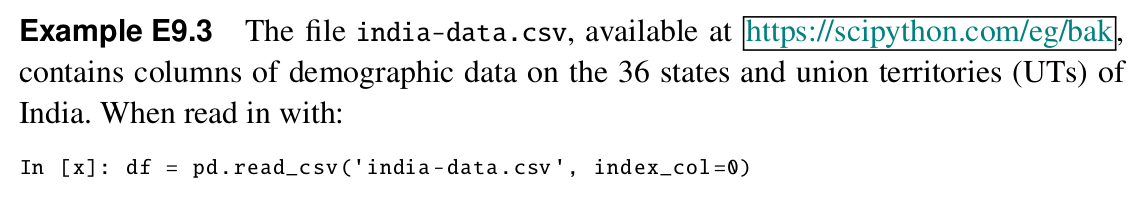

In [ ]:
!wget -c https://scipython.com/static/media/2/examples/E9/india-data.csv

--2024-03-08 01:14:46--  https://scipython.com/static/media/2/examples/E9/india-data.csv
Resolving scipython.com (scipython.com)... 3.130.82.216
Connecting to scipython.com (scipython.com)|3.130.82.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1876 (1.8K) [text/csv]
Saving to: ‘india-data.csv’

india-data.csv      100%[===================>]   1.83K  --.-KB/s    in 0s      

2024-03-08 01:14:47 (126 MB/s) - ‘india-data.csv’ saved [1876/1876]



In [ ]:
pd.read

In [ ]:
df = pd.read_csv('india-data.csv', index_col=0)

In [ ]:
df

,Male Population,Female Population,Area (km2),Male Literacy (%),Fertility Rate,Female Literacy (%)
State/UT,,,,,,
Uttar Pradesh,104480510,95331831,240928,79.24,3.7,59.26
Maharashtra,58243056,54131277,307713,89.82,1.9,75.48
Bihar,54278157,49821295,94163,73.39,3.9,53.33
West Bengal,46809027,44467088,88752,82.67,1.9,71.16
Madhya Pradesh,37612306,35014503,308245,80.53,3.3,60.02
Tamil Nadu,36137975,36009055,130058,86.81,1.7,73.86
Rajasthan,35550997,32997440,342239,80.51,3.3,52.66
Karnataka,30966657,30128640,191791,82.85,1.9,68.13
Gujarat,31491260,28948432,196024,87.23,2.5,70.73


In [ ]:
df.index

Index(['Uttar Pradesh', 'Maharashtra', 'Bihar', 'West Bengal',
       'Madhya Pradesh', 'Tamil Nadu', 'Rajasthan', 'Karnataka', 'Gujarat',
       'Andhra Pradesh', 'Odisha', 'Telangana', 'Kerala', 'Jharkhand', 'Assam',
       'Punjab', 'Chhattisgarh', 'Haryana', 'Delhi', 'Jammu and Kashmir',
       'Uttarakhand', 'Himachal Pradesh', 'Tripura', 'Meghalaya', 'Manipur',
       'Nagaland', 'Goa', 'Arunachal Pradesh', 'Puducherry', 'Mizoram',
       'Chandigarh', 'Sikkim', 'Andaman and Nicobar Islands',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Lakshadweep'],
      dtype='object', name='State/UT')

In [ ]:
df.columns

Index(['Male Population', 'Female Population', 'Area (km2)',
       'Male Literacy (%)', 'Fertility Rate', 'Female Literacy (%)'],
      dtype='object')

In [ ]:
df.head()

,Male Population,Female Population,Area (km2),Male Literacy (%),Fertility Rate,Female Literacy (%)
State/UT,,,,,,
Uttar Pradesh,104480510,95331831,240928,79.24,3.7,59.26
Maharashtra,58243056,54131277,307713,89.82,1.9,75.48
Bihar,54278157,49821295,94163,73.39,3.9,53.33
West Bengal,46809027,44467088,88752,82.67,1.9,71.16
Madhya Pradesh,37612306,35014503,308245,80.53,3.3,60.02


In [ ]:
#cálculos com colunas
df['Population'] = df['Male Population'] + df['Female Population']

In [ ]:
df

,Male Population,Female Population,Area (km2),Male Literacy (%),Fertility Rate,Female Literacy (%),Population
State/UT,,,,,,,
Uttar Pradesh,104480510,95331831,240928,79.24,3.7,59.26,199812341
Maharashtra,58243056,54131277,307713,89.82,1.9,75.48,112374333
Bihar,54278157,49821295,94163,73.39,3.9,53.33,104099452
West Bengal,46809027,44467088,88752,82.67,1.9,71.16,91276115
Madhya Pradesh,37612306,35014503,308245,80.53,3.3,60.02,72626809
Tamil Nadu,36137975,36009055,130058,86.81,1.7,73.86,72147030
Rajasthan,35550997,32997440,342239,80.51,3.3,52.66,68548437
Karnataka,30966657,30128640,191791,82.85,1.9,68.13,61095297
Gujarat,31491260,28948432,196024,87.23,2.5,70.73,60439692


In [ ]:
df['Population'].sum(), df['Population'].mean(), df['Population'].std()

(1210754977, 33632082.69444445, 43053170.027725115)

In [ ]:
df['Population Density (km-2)'] = df['Population'] / df['Area (km2)']

In [ ]:
df.head()

,Male Population,Female Population,Area (km2),Male Literacy (%),Fertility Rate,Female Literacy (%),Population,Population Density (km-2)
State/UT,,,,,,,,
Uttar Pradesh,104480510,95331831,240928,79.24,3.7,59.26,199812341,829.344622
Maharashtra,58243056,54131277,307713,89.82,1.9,75.48,112374333,365.192023
Bihar,54278157,49821295,94163,73.39,3.9,53.33,104099452,1105.523953
West Bengal,46809027,44467088,88752,82.67,1.9,71.16,91276115,1028.440091
Madhya Pradesh,37612306,35014503,308245,80.53,3.3,60.02,72626809,235.613908


In [ ]:
df['Male Literacy (%)'].min()

73.39

In [ ]:
df['Male Literacy (%)'].idxmin()

'Bihar'

In [ ]:
df['Area (km2)'].max(), df['Area (km2)'].idxmax()

(342239, 'Rajasthan')

In [ ]:
df['Population Density (km-2)'].idxmax()

'Delhi'

In [ ]:
df.loc[df['Population Density (km-2)'].idxmax()]

Male Population              8.887326e+06
Female Population            7.800615e+06
Area (km2)                   1.484000e+03
Male Literacy (%)            9.103000e+01
Fertility Rate               1.900000e+00
Female Literacy (%)          8.093000e+01
Population                   1.668794e+07
Population Density (km-2)    1.124524e+04
Name: Delhi, dtype: float64

In [ ]:
#correlação linear
df['Female Literacy (%)'].corr(df['Fertility Rate'])

-0.7361949271996956

<Axes: xlabel='Female Literacy (%)', ylabel='Fertility Rate'>

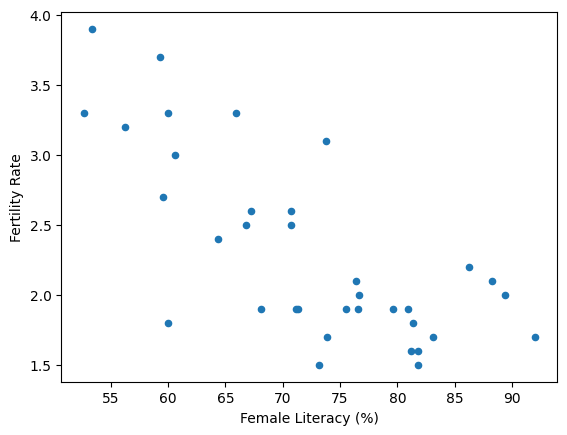

In [ ]:
#também é possível fazer gráficos simples
df.plot.scatter('Female Literacy (%)', 'Fertility Rate')

## Leitura e escrita de arquivos no pandas

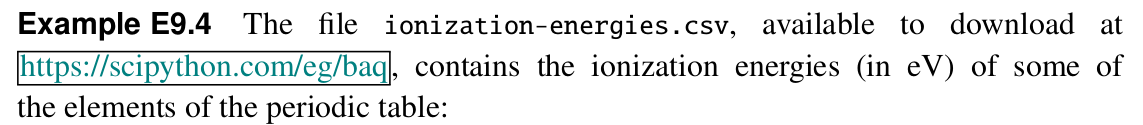

In [ ]:
!wget -c https://scipython.com/static/media/2/examples/E9/ionization-energies.csv

--2024-03-08 01:25:11--  https://scipython.com/static/media/2/examples/E9/ionization-energies.csv
Resolving scipython.com (scipython.com)... 3.130.82.216
Connecting to scipython.com (scipython.com)|3.130.82.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 558 [text/csv]
Saving to: ‘ionization-energies.csv’

ionization-energies 100%[===================>]     558  --.-KB/s    in 0s      

2024-03-08 01:25:12 (202 MB/s) - ‘ionization-energies.csv’ saved [558/558]



In [ ]:
!head -n 20 ionization-energies.csv

Ionization Energies (eV) of the first few elements of the periodic table
Element, IE1, IE2, IE3, IE4, IE5
H, 13.59844
He, 24.58741, 54.41778
Li, 5.39172, 75.64018, 122.45429
Be, 9.3227, 18.21116, 153.89661, 217.71865
B, 8.29803, 25.15484, 37.93064, 259.37521, 340.22580
C, 11.26030, 24.38332, 47.8878, 64.4939, 392.087
N, 14.53414, 29.6013, 47.44924, 77.4735, 97.8902
O, 13.61806, 35.11730, 54.9355, 77.41353, 113.8990
F, 17.42282, 34.97082, 62.7084, 87.1398, 114.2428
Ne, 21.5646, 40.96328, 63.45, 97.12, 126.21
Na, 5.13908, 47.2864, 71.6200, 98.91, 138.40


In [ ]:
list(range(5))

In [ ]:
df = pd.read_csv('ionization-energies.csv',
                 skiprows=1, #pular a primeira linha
                 index_col=0, #use a primeiro coluna com índice
                 usecols=range(5), #colunas 1 a 5
                 nrows=11) #quantas linhas queremos

In [ ]:
df

,IE1,IE2,IE3,IE4
Element,,,,
H,13.59844,NaN,NaN,NaN
He,24.58741,54.41778,NaN,NaN
Li,5.39172,75.64018,122.45429,NaN
Be,9.32270,18.21116,153.89661,217.71865
B,8.29803,25.15484,37.93064,259.37521
C,11.26030,24.38332,47.88780,64.49390
N,14.53414,29.60130,47.44924,77.47350
O,13.61806,35.11730,54.93550,77.41353
F,17.42282,34.97082,62.70840,87.13980


In [ ]:
#note os espaços em branco
df.columns

Index([' IE1', ' IE2', ' IE3', ' IE4'], dtype='object')

In [ ]:
df.columns.str.strip()

Index(['IE1', 'IE2', 'IE3', 'IE4'], dtype='object')

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.columns

Index(['IE1', 'IE2', 'IE3', 'IE4'], dtype='object')

In [ ]:
df.loc['Li'].IE2

75.64018

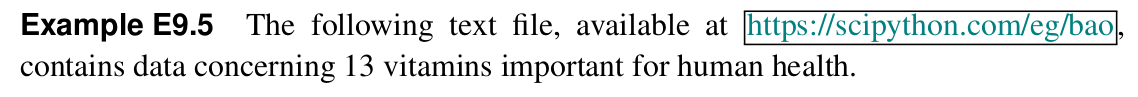

In [ ]:
!wget -c https://scipython.com/static/media/2/examples/E9/vitamins.txt

--2024-03-08 01:28:41--  https://scipython.com/static/media/2/examples/E9/vitamins.txt
Resolving scipython.com (scipython.com)... 3.130.82.216
Connecting to scipython.com (scipython.com)|3.130.82.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 619 [text/plain]
Saving to: ‘vitamins.txt’

vitamins.txt        100%[===================>]     619  --.-KB/s    in 0s      

2024-03-08 01:28:42 (151 MB/s) - ‘vitamins.txt’ saved [619/619]



In [ ]:
!head vitamins.txt

List of vitamins, their solubility (in fat or water) and recommended dietary
allowances for men / women.
Data from the US Food and Nutrition Board, Institute of Medicine, National
Academies

Vitamin A   Fat     900ug/700ug

Vitamin B1  Water   1.2mg/1.1mg
Vitamin B2  Water   1.3mg/1.1mg
Vitamin B3  Water   16mg/14mg


In [ ]:
!tail vitamins.txt

Vitamin B6  Water   1.5mg/1.4mg
Vitamin B7  Water   30ug
Vitamin B9  Water   400ug
Vitamin B12 Water   2.4ug

Vitamin C   Water   90mg/75mg
Vitamin D   Fat     15ug
Vitamin E   Fat     15mg
Vitamin K   Fat     110ug/120ug
--- Data for guidance only, consult your physician ---


In [ ]:
def average_rda_in_micrograms(col):
    def ensure_micrograms(s):
        if s.endswith('ug'):
            return float(s[:-2])
        elif s.endswith('mg'):
            return float(s[:-2]) * 1000
        raise ValueError(f'Unrecognised units in {s}')
    fields = col.split('/')
    return sum([ensure_micrograms(s) for s in fields]) / len(fields)

In [ ]:
df_vitamins = pd.read_csv('vitamins.txt',
                 delim_whitespace=True,
                 skiprows=4,
                 skipfooter=1,
                 header=None,
                 usecols=(1, 2, 3),
                 converters={'RDA': average_rda_in_micrograms},
                 names=['Vitamin', 'Solubility', 'RDA'],
                 index_col=0
                )

<ipython-input-167-761f2772c2d2>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_vitamins = pd.read_csv('vitamins.txt',


In [ ]:
df_vitamins

,Solubility,RDA
Vitamin,,
A,Fat,800.0
B1,Water,1150.0
B2,Water,1200.0
B3,Water,15000.0
B5,Water,5000.0
B6,Water,1450.0
B7,Water,30.0
B9,Water,400.0
B12,Water,2.4


**Colunas com largura fixa**

In [ ]:
s=""" 12  100.231.03
 11 1201.842.04
 11   99.324.02"""

In [ ]:
with open("teste.txt",'w') as f:
   f.write(s)

In [ ]:
!cat teste.txt

 12  100.231.03
 11 1201.842.04
 11   99.324.02

In [ ]:
df = pd.read_fwf('teste.txt',
                 colspecs=[(0, 2), (2, 3), (3, 12), (12, 15)],
                 header=None)

In [ ]:
df

,0,1,2,3
0,1,2,100.231,0.03
1,1,1,1201.842,0.04
2,1,1,99.324,0.02


In [ ]:
df = pd.read_fwf('teste.txt', widths=(2, 1, 9, 3), header=None)
df

,0,1,2,3
0,1,2,100.231,0.03
1,1,1,1201.842,0.04
2,1,1,99.324,0.02


**Escrevendo arquivos**

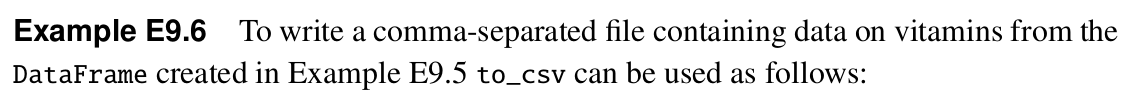

In [ ]:
df_vitamins

,Solubility,RDA
Vitamin,,
A,Fat,800.0
B1,Water,1150.0
B2,Water,1200.0
B3,Water,15000.0
B5,Water,5000.0
B6,Water,1450.0
B7,Water,30.0
B9,Water,400.0
B12,Water,2.4


In [ ]:
df_vitamins.to

In [ ]:
df_vitamins.to_csv('vitamins.csv', float_format='%.1f', columns=['Solubility', 'RDA'])

In [ ]:
!head vitamins.csv

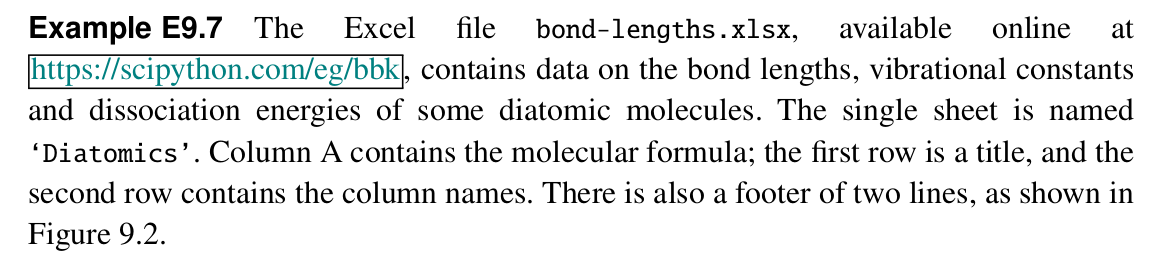

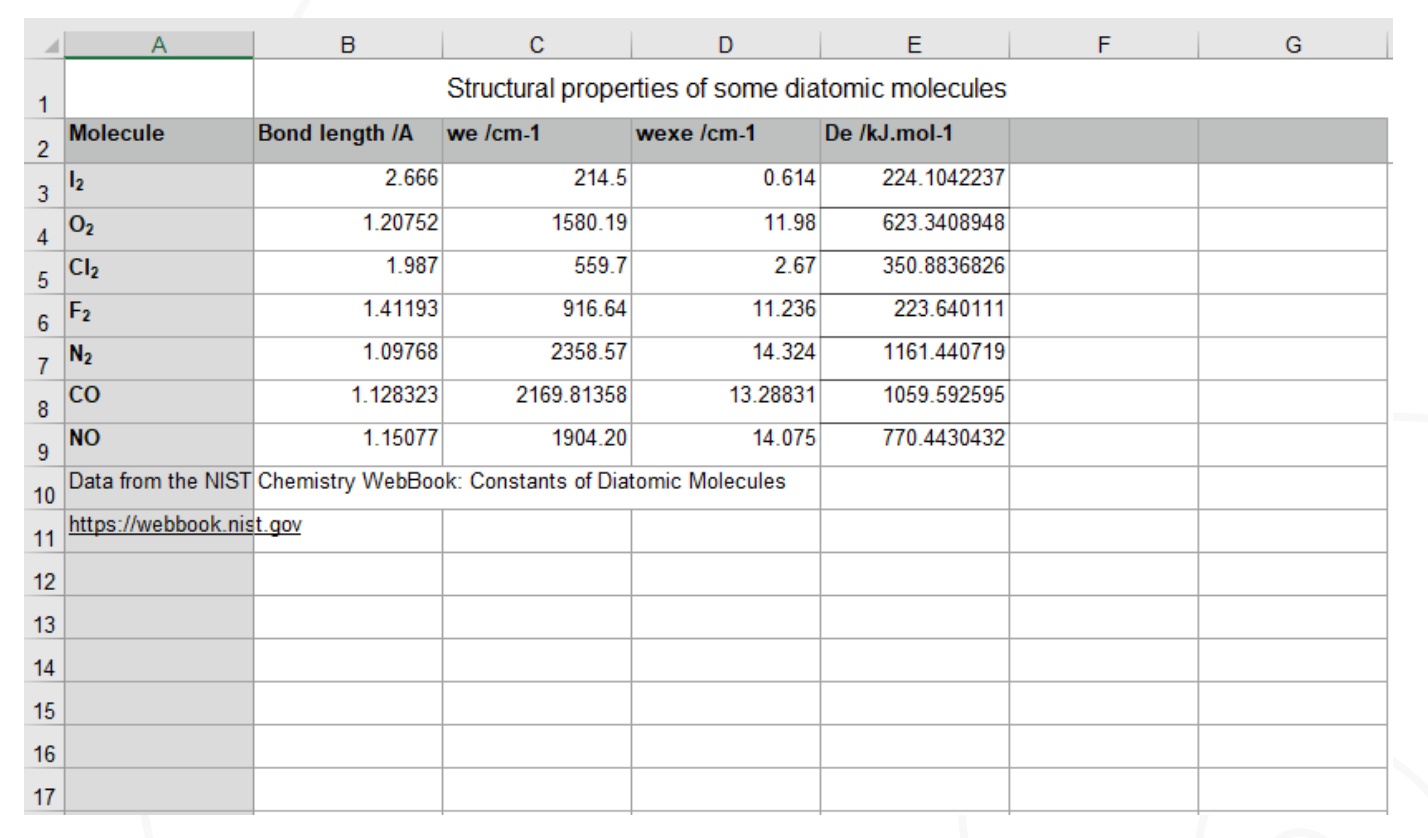

In [ ]:
#para ler xls e xlsx
!pip install xlrd

In [ ]:
!wget -c https://scipython.com/static/media/2/examples/E9/bond-lengths.xlsx

--2024-03-08 01:38:42--  https://scipython.com/static/media/2/examples/E9/bond-lengths.xlsx
Resolving scipython.com (scipython.com)... 3.130.82.216
Connecting to scipython.com (scipython.com)|3.130.82.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11512 (11K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘bond-lengths.xlsx’

bond-lengths.xlsx   100%[===================>]  11.24K  --.-KB/s    in 0.001s  

2024-03-08 01:38:43 (11.9 MB/s) - ‘bond-lengths.xlsx’ saved [11512/11512]



In [ ]:
df = pd.read_excel('bond-lengths.xlsx',
        index_col=0,
                   # the first column contains the index labels
        skipfooter=2,           # ignore the last two lines of the sheet
        header=1,               # take the column names from the second row
        usecols='A:E',          # use Excel columns labeled A-E
        sheet_name='Diatomics'  # take data from this sheet
        )

In [ ]:
df

,Bond length /A,we /cm-1,wexe /cm-1,De /kJ.mol-1
Molecule,,,,
I2,2.666000,214.50000,0.61400,224.104224
O2,1.207520,1580.19000,11.98000,623.340895
Cl2,1.987000,559.70000,2.67000,350.883683
F2,1.411930,916.64000,11.23600,223.640111
N2,1.097680,2358.57000,14.32400,1161.440719
CO,1.128323,2169.81358,13.28831,1059.592595
NO,1.150770,1904.20000,14.07500,770.443043


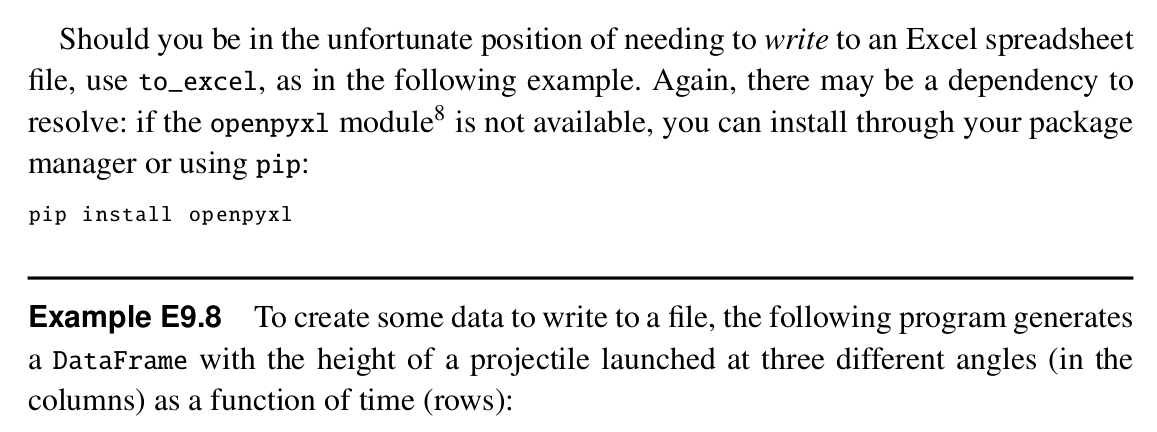

In [ ]:
# Acceleration due to gravity, m.s-2.
g = 9.81

# Time grid, s.
t = np.linspace(0, 5, 500)
# Projectile launch angles, deg.
theta0 = np.array([30, 45, 80])
# Projectile launch speen, m.s-1.
v0 = 20

def z(t, v0, theta0):
    """Return the height of the projectile at time t > 0."""
    return -g/2 * t**2 + v0*t*np.sin(theta0)

def x(t, v0, theta0):
    """Return the range of the projectile at time t > 0."""
    return v0 * t * np.cos(theta0)

In [ ]:
# An empty DataFrame with columns for the different launch angles.
df = pd.DataFrame(columns=theta0, index=t)

In [ ]:
df

,30,45,80
0.00000,NaN,NaN,NaN
0.01002,NaN,NaN,NaN
0.02004,NaN,NaN,NaN
0.03006,NaN,NaN,NaN
0.04008,NaN,NaN,NaN
...,...,...,...
4.95992,NaN,NaN,NaN
4.96994,NaN,NaN,NaN
4.97996,NaN,NaN,NaN
4.98998,NaN,NaN,NaN


In [ ]:
# Populate df with the projectile heights as a function of time.
for theta in theta0:
    df[theta] = z(t, v0, np.radians(theta))

In [ ]:
df

,30,45,80
0.00000,0.000000,0.000000,0.000000
0.01002,0.099708,0.141212,0.196864
0.02004,0.198431,0.281440,0.392743
0.03006,0.296169,0.420682,0.587637
0.04008,0.392922,0.558940,0.781546
...,...,...,...
4.95992,-71.067749,-50.523089,-22.975597
4.96994,-71.455585,-50.869419,-23.266277
4.97996,-71.844405,-51.216735,-23.557941
4.98998,-72.234210,-51.565036,-23.850590


In [ ]:
# Once the projectile has landed (z <= 0), set the height data as invalid.
df[df<=0] = np.nan

In [ ]:
df

,30,45,80
0.00000,NaN,NaN,NaN
0.01002,0.099708,0.141212,0.196864
0.02004,0.198431,0.281440,0.392743
0.03006,0.296169,0.420682,0.587637
0.04008,0.392922,0.558940,0.781546
...,...,...,...
4.95992,NaN,NaN,NaN
4.96994,NaN,NaN,NaN
4.97996,NaN,NaN,NaN
4.98998,NaN,NaN,NaN


30     5.096805
45    10.193672
80    19.772537
dtype: float64


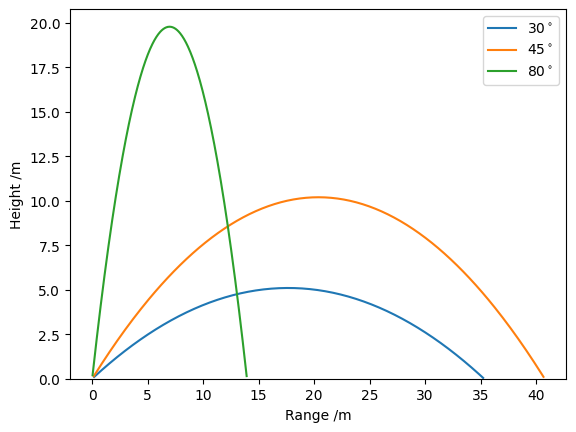

In [ ]:
f, ax = plt.subplots()
for theta in theta0:
    ax.plot(x(t, v0, np.radians(theta)), df[theta], label=f'${theta}^\circ$')

# The maximum height obtained by the projectile for each value of theta0.
heights = df.max()
print(heights)
# Set the y-limits with a bit of padding at the top; label the axes.
ax.set_ylim(0, heights.max()*1.05)
ax.set_xlabel('Range /m')
ax.set_ylabel('Height /m')
ax.legend()

In [ ]:
#pare escrever xls
!pip install openpyxl

In [ ]:
df.to_excel('projectile.xlsx', sheet_name='Dependence on angle')

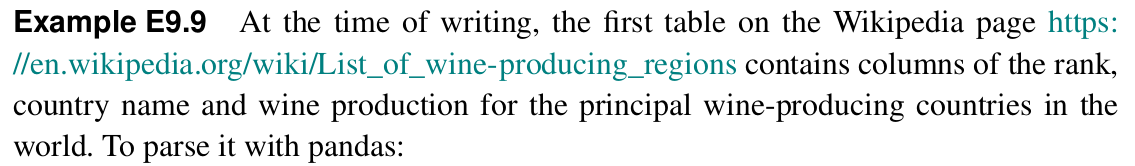

In [ ]:
dfs = pd.read_html(
              'https://en.wikipedia.org/wiki/List_of_wine-producing_regions',
              index_col=1,
              match="Wine production by country")

In [ ]:
dfs

[                                     Rank  Production (tonnes)
 Country (with link to wine article)                           
 Italy                                   1              4796900
 Spain                                   2              4607850
 France                                  3              4293466
 United States                           4              3300000
 China                                   5              1700000
 ...                                   ...                  ...
 Tajikistan                             70                  150
 Liechtenstein                          71                   79
 Syria                                  72                   70
 Poland                                 73                   49
 Réunion                                74                   30
 
 [74 rows x 2 columns]]

In [ ]:
len(dfs)

1

In [ ]:
dfs[0]

,Rank,Production (tonnes)
Country (with link to wine article),,
Italy,1,4796900
Spain,2,4607850
France,3,4293466
United States,4,3300000
China,5,1700000
...,...,...
Tajikistan,70,150
Liechtenstein,71,79
Syria,72,70


## Problemas do Capítulo 9

In [ ]:
estutandes_pos = [
    "Anna Lucchi", "Adriano Neves", "Carlos Batistela", "Gabriel Colombo",
    "Hugo Machado", "Jean Passos", "Jhonatan Berrar", "Leonardo Voltarelli",
    "Luiz Pantaleão", "Marcelo Oliveira", "Manoel Souza", "Mateus Tarozo",
    "Mônica Prates", "Vitor Ribeiro"
]

estudantes_grad = [
    "ABIMAEL LINO RIBEIRO", "ANA CRISTINA SANTOS VIEIRA",
    "ANGELO AGGIO FLORES", "ARÃO VICTOR ROCHA DOS SANTOS",
    "BRUNO MAIA DE SOUZA", "CAMILA DOS SANTOS SOUZA",
    "CHRISTIAN MOREIRA MENDES", "CRISTIAN LOPES DOS SANTOS", "ENZO CALIALI",
    "FERNANDO HENRIQUE MOREIRA VALDIR", "GABRIEL CARDOSO DE MORAES",
    "GABRIEL MARTINS DUBAS", "GILMAR HORCHULHAK", "GIOVANNI ENZO DELMONACO",
    "GRAZIELLA DIAS DE MENDONÇA", "IAN CAPÉL VENDRAMIN",
    "JOÃO GUILHERME DE SOUZA CAMPAGNOLI", "JOAO PEDRO FULGENCIO DO NASCIMENTO",
    "JOHNATAN ZACARIOTO GOMES", "JOSÉ LEONARDO OLER", "JÚLIA DE SOUZA FLÓES",
    "KESLER PIERRE", "LEONARDO BAPTISTA DE PAULA NETO",
    "LEONARDO VINÍCIOS OLIVEIRA BRANCO", "LIEDSON ROCHA MARQUES",
    "LUCIANO SOARES DOS PRASERES JUNIOR", "MARCELO GUARNIERI",
    "MARCELO RYU DA ROCHA", "MARIA JULIA COSTA MISTURA",
    "MATHEUS ALVES DA SILVA", "MATHEUS BELASQUE MONTEIRO DE LIMA",
    "MATHEUS DI DOMENICO", "MICHEL RUAN ALVES CARVALHO",
    "NICOLAS DA SILVA FERNANDES", "PEDRO HENRIQUE MEDEIROS MONTALBAN",
    "PIETRO GIUSEPPE CARGNIN FERREIRA", "RAFAELA LAVAGNOLI",
    "RENATO HIROAKI IVANAGA", "ROSE MOURA QUIRINO", "RUDAH ALVES LEITE",
    "SAMUEL SALVADOR DOS SANTOS", "SOPHIA HELLEN DE ASSIS DOMINGUES",
    "THAINA GOMES PEREIRA ZAMPIERI", "Vitor Hugo Ferrari Ribeiro",
    "Kaique Gabriel Boldrin"
]

In [ ]:
range_problemas_caps6e7 = [
    ["P9.2.1", "P9.2.5"],
    ["P9.3.1", "P9.3.2"],
    ["P9.4.1", "P9.4.4"],
    ["P9.5.1", "P9.5.2"],
]

In [ ]:
lista_problemas = []
for range_p in range_problemas_caps6e7:
    i_min=int(range_p[0].split('.')[-1])
    i_max=int(range_p[1].split('.')[-1])

    prefix = '.'.join(range_p[0].split('.')[:2])

    for i in range(i_min,i_max+1):
        lista_problemas.append(f"{prefix}.{i}")

In [ ]:
print(f"Total de problemas no capítulo 9: {len(lista_problemas)}")

Total de problemas no capítulo 9: 13


In [ ]:
print(f"Total de estudantes de graduação....: {len(estudantes_grad)}")
print(f"Total de estudantes de pós-graduação: {len(estutandes_pos)}")
print(" "*37+"+--")
print(" "*38+f"{len(estutandes_pos)+len(estudantes_grad)}")

Total de estudantes de graduação....: 45
Total de estudantes de pós-graduação: 14
                                     +--
                                      59


In [ ]:
n_problemas = 5

problemas_estudantes = {}

for estudante in estutandes_pos+estudantes_grad:
    problemas_sel = np.random.choice(lista_problemas,size=n_problemas,replace=False)
    problemas_estudantes[estudante.title()] = sorted(list(problemas_sel))

In [ ]:
df = pd.DataFrame(problemas_estudantes).T
df.tail()

,0,1,2,3,4
Samuel Salvador Dos Santos,P9.2.1,P9.2.4,P9.3.1,P9.3.2,P9.4.2
Sophia Hellen De Assis Domingues,P9.2.1,P9.2.2,P9.3.2,P9.4.1,P9.4.4
Thaina Gomes Pereira Zampieri,P9.2.3,P9.2.5,P9.3.1,P9.4.1,P9.5.1
Vitor Hugo Ferrari Ribeiro,P9.2.2,P9.2.3,P9.3.2,P9.4.1,P9.4.2
Kaique Gabriel Boldrin,P9.2.1,P9.2.5,P9.3.1,P9.4.2,P9.4.3


In [ ]:
df.to_excel('problemas_cap_9.xlsx')